In [1]:
import os
import sys

try:
    from fluidity_tools import stat_parser as stat
except ImportError:
    # try again by adding the path "../python" relative to testharness' own location to sys.path
    head, tail = os.path.split(sys.argv[0])
    # python_path = os.path.abspath(os.path.join(head, '..', 'python'))
    sys.path.append('/home/gn/Code/fetch2012/fluidity/python')
    from fluidity_tools import stat_parser as stat



In [2]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import linregress
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# plt.rcParams["font.family"] = "Times New Roman"
# Make background white
plt.style.use('default')

def compare_plot(x1, y1, x2, y2, label1=None, label2=None, xlabel=None, ylabel=None, **kwargs):#
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(x1, y1, marker='o', label=label1, **kwargs)
    ax.plot(x2, y2, marker='o', label=label2, **kwargs)
    plt.legend()
    plt.xlim(left=0)
    plt.ylim(bottom=0)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    ax.grid(True)
    return fig, ax


 # Investigation on the performance of the Load Balancer for FETCH2.
 In this report the behaviour of the load balancer is investigated as part of a bigger system. We are trying to
 understand how the performance of the load balancer affects the performance of our linear solver.
 The following topics are examined in the report:
 - Time spent on load balancer
 - Time spent on load balancer as a function of CPUs, Elements and halo nodes
 - Time spent doing a solve as a function of CPUs, Elements and halo nodes
 - Strong scaling studies for the asymmetrical brunner lattice problem
 - Weak scaling studies for the asymmetrical brunner lattice problem#


 ## Are we better off load balancing? overall performance with load balancer on vs load balancer off
 The runtime of FETCH appears to be doubled when the load balancer is disabled for this simple but highly
 asymmetrical problem.


[]

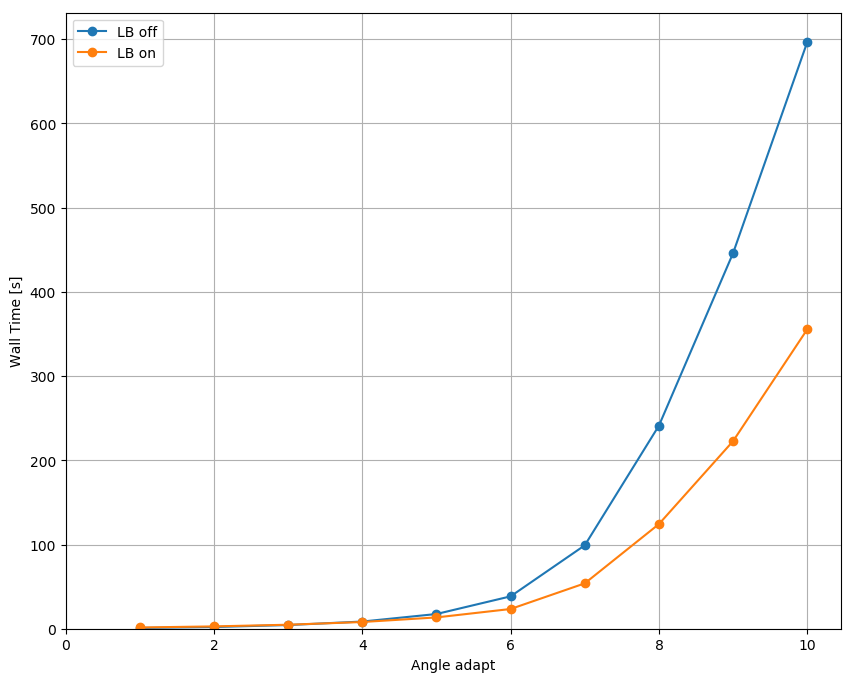

In [3]:
os.chdir('/home/gn/Code/ssh/sdargav/tolerance_study')
wall_time_off = stat('rad_radiant_tol1000000.Neutron.output_quantities.stat')['ElapsedWallTime']['Value']
wall_time_on = stat('rad_radiant_tol1.05.Neutron.output_quantities.stat')['ElapsedWallTime']['Value']
angle_adapt = stat('rad_radiant_tol1.05.Neutron.output_quantities.stat')['AngleAdaptCount']['Value']

compare_plot(range(1, len(angle_adapt)+1), wall_time_off, range(1, len(angle_adapt)+1), wall_time_on, 'LB off', 'LB on', 'Angle adapt', 'Wall Time [s]')
plt.plot()


 ## Are we better off load balancing? Time spent on solver when LB is off vs on
 It can be seen that the doubling of walltime when the load balancer is disabled clearly transfers to the solver


/home/gn/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


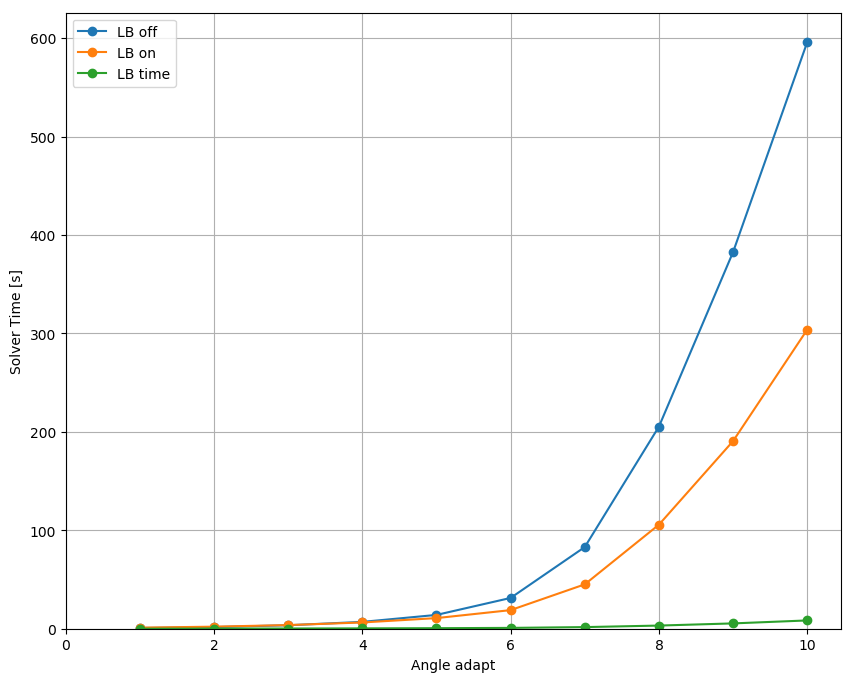

In [4]:
solve_lb_off = stat('rad_radiant_tol1000000.Neutron.output_quantities.stat')['RadiantSolveTime']['Value']
solve_lb_on = stat('rad_radiant_tol1.05.Neutron.output_quantities.stat')['RadiantSolveTime']['Value']
angle_adapt = stat('rad_radiant_tol1.05.Neutron.output_quantities.stat')['AngleAdaptCount']['Value']
lb_time = stat('rad_radiant_tol1.05.Neutron.output_quantities.stat')['RadiantLoadBalanceTime']['Value']

fig, ax = compare_plot(range(1, len(angle_adapt)+1), solve_lb_off, range(1, len(angle_adapt)+1), solve_lb_on, 'LB off', 'LB on', 'Angle adapt', 'Solver Time [s]')
ax.plot(range(1, len(angle_adapt)+1), lb_time, marker='o', label='LB time')
ax.legend()
fig.show()


 ## What fraction of the total time is spent in the load balancer?
 Here we compare the time against the solver and against a few imbalance tolerances
 - In the figure we ca also observe that the run with the most time load balancing, which has the lowest tolerance,
 is also the one where we spent less time in our linear solver.


Typical LB times are:  3.2116752961296173 % of the total runtime


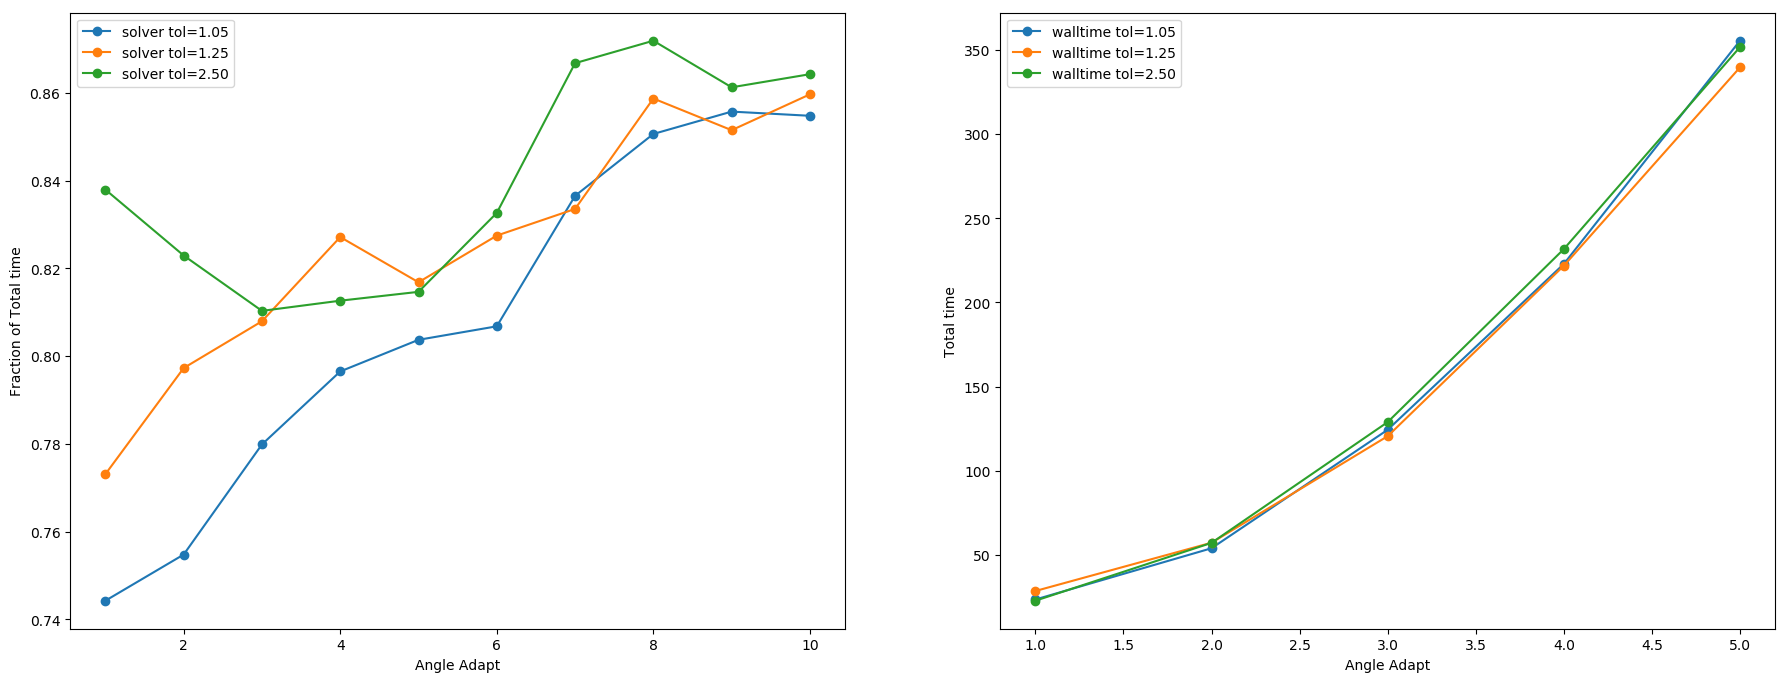

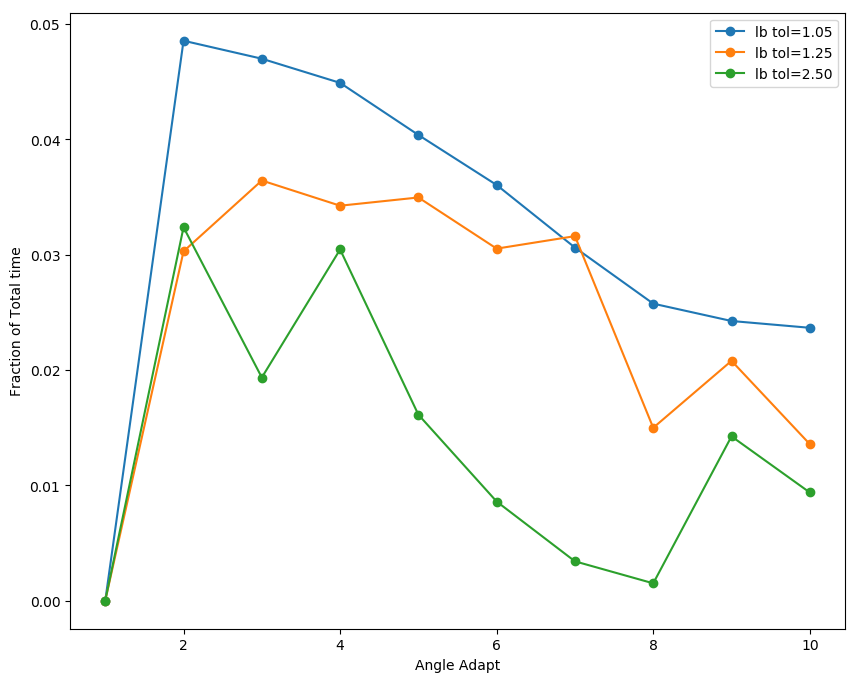

In [5]:
angle_adapt = stat('rad_radiant_tol1.05.Neutron.output_quantities.stat')['AngleAdaptCount']['Value']

solve_time_105 = stat('rad_radiant_tol1.05.Neutron.output_quantities.stat')['RadiantSolveTime']['Value']
lb_time_105 = stat('rad_radiant_tol1.05.Neutron.output_quantities.stat')['RadiantLoadBalanceTime']['Value']
wall_time_105 = stat('rad_radiant_tol1.05.Neutron.output_quantities.stat')['ElapsedWallTime']['Value']

solve_time_125 = stat('rad_radiant_tol1.25.Neutron.output_quantities.stat')['RadiantSolveTime']['Value']
lb_time_125 = stat('rad_radiant_tol1.25.Neutron.output_quantities.stat')['RadiantLoadBalanceTime']['Value']
wall_time_125 = stat('rad_radiant_tol1.25.Neutron.output_quantities.stat')['ElapsedWallTime']['Value']

solve_time_250 = stat('rad_radiant_tol2.50.Neutron.output_quantities.stat')['RadiantSolveTime']['Value']
lb_time_250 = stat('rad_radiant_tol2.50.Neutron.output_quantities.stat')['RadiantLoadBalanceTime']['Value']
wall_time_250 = stat('rad_radiant_tol2.50.Neutron.output_quantities.stat')['ElapsedWallTime']['Value']

# Get the ratio compared to the total time
r_solve_time_105 = solve_time_105/ wall_time_105
r_solve_time_125 = solve_time_125/ wall_time_125
r_solve_time_250 = solve_time_250/ wall_time_250

r_lb_time_105 = lb_time_105/ wall_time_105
r_lb_time_125 = lb_time_125/ wall_time_125
r_lb_time_250 = lb_time_250/ wall_time_250

# todo: add the wall-time not a ratio, why is happening, we only miss 
# todo: indicate the markers for when we load balance


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 8))
ax1.plot(range(1, len(angle_adapt)+1), r_solve_time_105, label='solver tol=1.05', marker='o')
ax1.plot(range(1, len(angle_adapt)+1), r_solve_time_125, label='solver tol=1.25', marker='o')
ax1.plot(range(1, len(angle_adapt)+1), r_solve_time_250, label='solver tol=2.50', marker='o')

ax2.plot(range(1, len(angle_adapt[5:])+1), wall_time_105[5:], label='walltime tol=1.05', marker='o')
ax2.plot(range(1, len(angle_adapt[5:])+1), wall_time_125[5:], label='walltime tol=1.25', marker='o')
ax2.plot(range(1, len(angle_adapt[5:])+1), wall_time_250[5:], label='walltime tol=2.50', marker='o')

ax1.legend()
ax1.set(xlabel='Angle Adapt', ylabel='Fraction of Total time')
ax2.legend()
ax2.set(xlabel='Angle Adapt', ylabel='Total time')
fig.show()

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(range(1, len(angle_adapt)+1), r_lb_time_105, label='lb tol=1.05', marker='o')
ax.plot(range(1, len(angle_adapt)+1), r_lb_time_125, label='lb tol=1.25', marker='o')
ax.plot(range(1, len(angle_adapt)+1), r_lb_time_250, label='lb tol=2.50', marker='o')

ax.legend()
ax.set(xlabel='Angle Adapt', ylabel='Fraction of Total time')
fig.show()

print('Typical LB times are: ', sum(r_lb_time_105)/len(r_lb_time_105) * 100, '% of the total runtime')


 ## Does the time spent in the load balancer depend on the load it has to balance (the work it has to do)
 Here we have to remember that our load balancer only operates on the owned nodes and not on the halos,
 but the trigger for the load balancer is checked against the halos.

 We are comparing relative times in the load balancer against the imbalance tolerance it has to minimise
 Anything on the left of the dotted lines has not been load balanced.

 Exactly because we are using tha halos as triggers, there will be these weird cases where the main partition
 has to be load balanced but the halo's imbalance is smaller than the tolerance, hence we need the red line
 to distinguish between these weird cases where a load balance should have happened but did not because of the halos.

 - In the figure you can see that a bigger imbalance to minimise, almost always, corresponds to more time spent
 load balancing

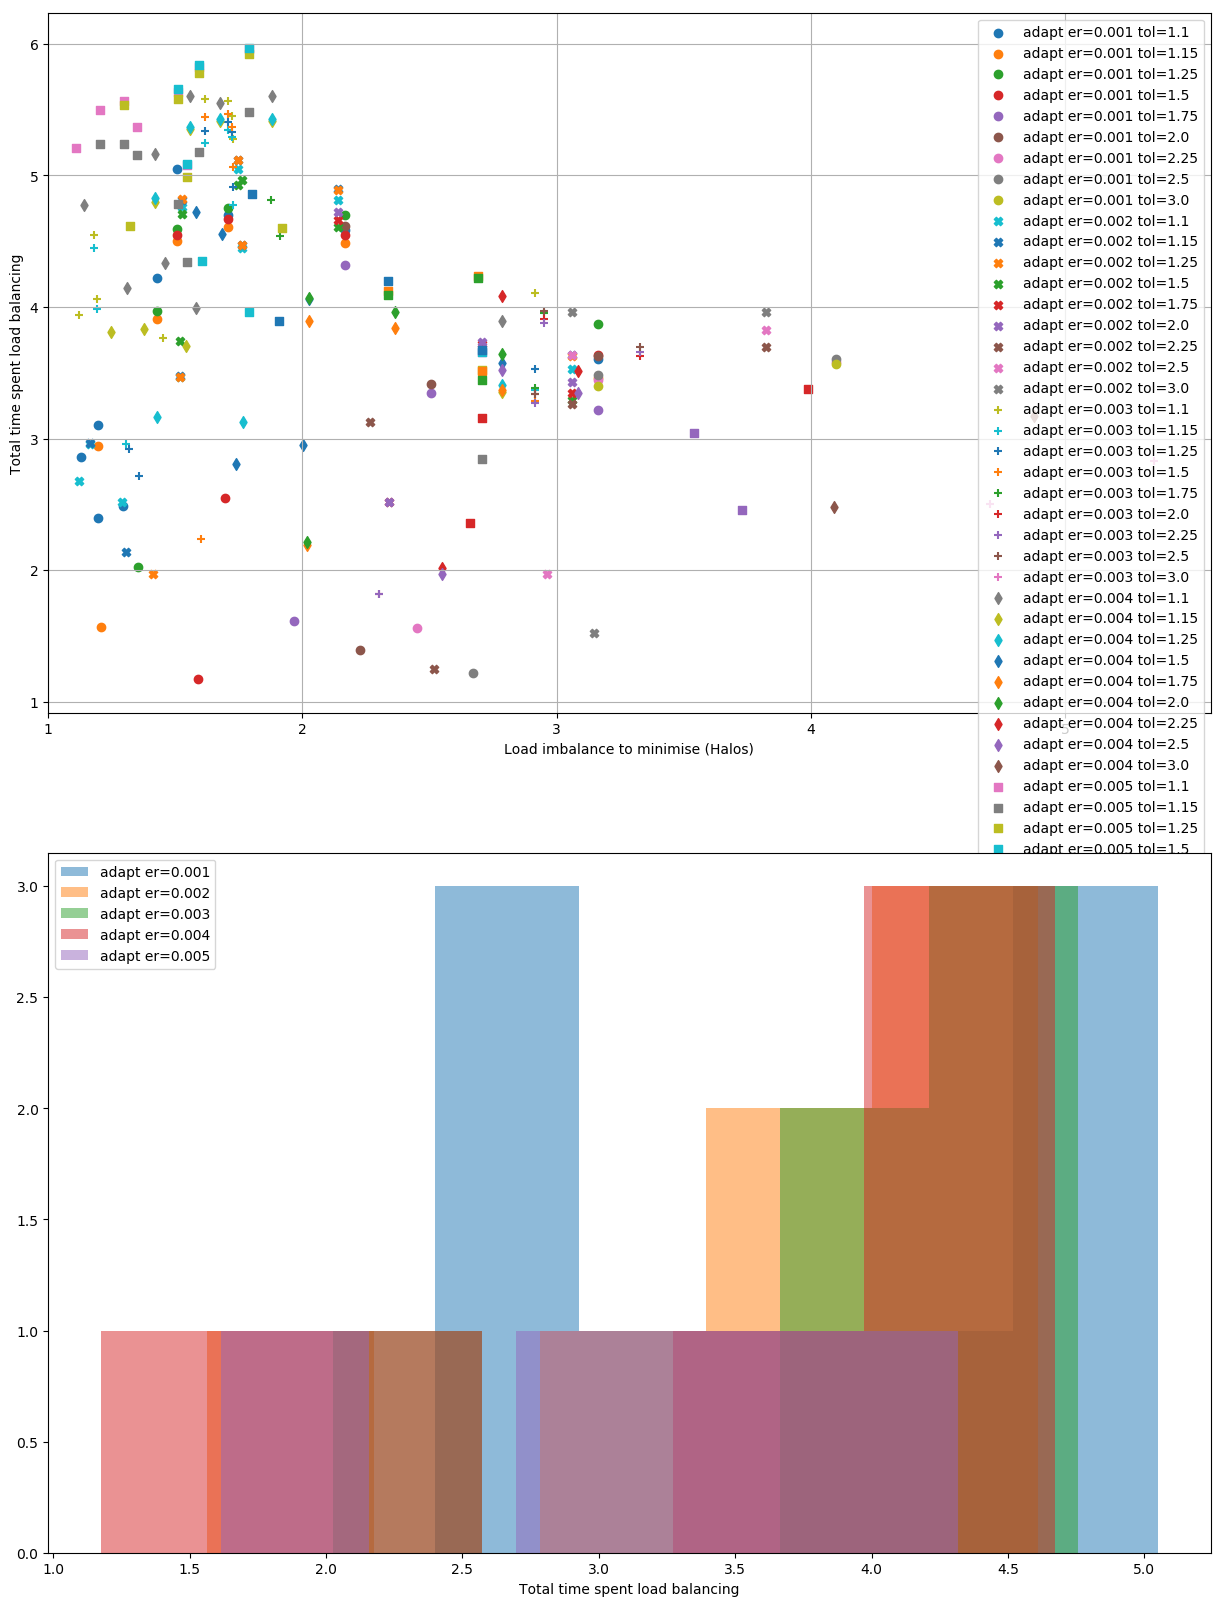

In [6]:
os.chdir('/home/gn/Code/ssh/sdargav/tolerance_study')
imb_105 = stat('rad_radiant_tol1.05.Neutron.output_quantities.stat')['LoadImbalanceHalos_gset_1']['Value']
imb_125 = stat('rad_radiant_tol1.25.Neutron.output_quantities.stat')['LoadImbalanceHalos_gset_1']['Value']
imb_250 = stat('rad_radiant_tol2.50.Neutron.output_quantities.stat')['LoadImbalanceHalos_gset_1']['Value']

fig, (ax, hist) = plt.subplots(2, 1, figsize=(15, 20))

# ax.scatter(imb_105, r_lb_time_105, label='tol=1.05', color='blue')
# ax.scatter(imb_125, r_lb_time_125, label='tol=1.25', color='orange') 
# ax.scatter(imb_250, r_lb_time_250, label='tol=2.50', color='green')

# todo: plot 3d histograms, different for every adapt error and 
os.chdir('/home/gn/Code/ssh/ese-selramma/tol_samp')
adapt_er = [0.001, 0.002, 0.003, 0.004, 0.005]
tolerance = [1.10, 1.15, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 3.00]
load_imb = []
r_lb_time = []
markers = ['o', 'X', '+', 'd', 's']
i = 0

# TODO: maybe only keep the last value for the load balancing time
for error, m in zip(adapt_er, markers):
    for t in tolerance:
        # Load data from files (walltime, loadbalance time, imbalance)
        fname = f'rad_radiant_noio_ader_{error:.3f}_tol_{t:.2f}.Neutron.output_quantities.stat'
        total_time = stat(fname)['ElapsedWallTime']['Value']
        r_lb = stat(fname)['RadiantLoadBalanceTime']['Value']
        imb = stat(fname)['LoadImbalanceHalos_gset_1']['Value']
        r_lb = r_lb / total_time * 100
        
        # Sort out the load balances that did not trigger the partitioner
        index = np.nonzero(imb > t)
        r_lb = r_lb[index]
        imb = imb[index]
        
        # Plot the loaded data
        ax.scatter(imb, r_lb, label=f'adapt er={str(error)} tol={str(t)}', marker=m)
        
        # Append the loaded data from file to local lists
        load_imb.append(imb)
        r_lb_time.append(r_lb)
        
    hist.hist(r_lb_time[i], 5, alpha=0.5, label=f'adapt er={str(error)}')
    i += 1
        

# todo: interesting thing to do would be to label the scatter points and see which belong to what adapt
# Anything on the left of these lines has not been load balanced
# ax.plot([1, 4], [0.02, 0.02], linestyle='-.', color='red')
# ax.plot([1.05, 1.05], [0, 0.06], linestyle='-.', color='blue')
# ax.plot([1.25, 1.25], [0, 0.06], linestyle='-.', color='orange')
# ax.plot([2.50, 2.50], [0, 0.06], linestyle='-.', color='green')

ax.grid(True)
ax.legend()
hist.legend()
ax.set_xlim(left=1.0)
# ax.set_ylim(bottom=0.0, top=0.06)
ax.set(xlabel='Load imbalance to minimise (Halos)', ylabel='Total time spent load balancing')
hist.set(xlabel='Total time spent load balancing')
plt.show()


In [7]:
########################### ARCHER ANALYSIS ############################################################################
cores = [48, 72, 96, 240]

os.chdir('/home/gn/Code/Archer/tests/core4')
solve_time_c4_arch = stat('rad_radiant_lb_hwn_asymmetrical_brunner_lattice.Neutron.output_quantities.stat')['RadiantSolveTime']['Value']
lb_time_c4_arch = stat('rad_radiant_lb_hwn_asymmetrical_brunner_lattice.Neutron.output_quantities.stat')['RadiantLoadBalanceTime']['Value']
wall_time_c4_arch = stat('rad_radiant_lb_hwn_asymmetrical_brunner_lattice.Neutron.output_quantities.stat')['ElapsedWallTime']['Value']
cdof_c4_arch = stat('rad_radiant_lb_hwn_asymmetrical_brunner_lattice.Neutron.output_quantities.stat')['ContinuousDOF_per_group']['Value']


# Load the 24 core data
os.chdir('../core24')
solve_time_c24_arch = stat('rad_radiant_lb_hwn_asymmetrical_brunner_lattice.Neutron.output_quantities.stat')['RadiantSolveTime']['Value']
lb_time_c24_arch = stat('rad_radiant_lb_hwn_asymmetrical_brunner_lattice.Neutron.output_quantities.stat')['RadiantLoadBalanceTime']['Value']
wall_time_c24_arch = stat('rad_radiant_lb_hwn_asymmetrical_brunner_lattice.Neutron.output_quantities.stat')['ElapsedWallTime']['Value']
cdof_c24_arch = stat('rad_radiant_lb_hwn_asymmetrical_brunner_lattice.Neutron.output_quantities.stat')['ContinuousDOF_per_group']['Value']


# Load the 48 core data
os.chdir('../core48')
solve_time_c48_arch = stat('rad_radiant_noio.Neutron.output_quantities.stat')['RadiantSolveTime']['Value']
lb_time_c48_arch = stat('rad_radiant_noio.Neutron.output_quantities.stat')['RadiantLoadBalanceTime']['Value']
wall_time_c48_arch = stat('rad_radiant_noio.Neutron.output_quantities.stat')['ElapsedWallTime']['Value']
cdof_c48_arch = stat('rad_radiant_noio.Neutron.output_quantities.stat')['ContinuousDOF_per_group']['Value']
# ----------------------------------------------------------------------------------------------------------------------
lb_time_c48_arch_refined1 = stat('rad_radiant_noio_refined1.Neutron.output_quantities.stat')['RadiantLoadBalanceTime']['Value']
wall_time_c48_arch_refined1 = stat('rad_radiant_noio_refined1.Neutron.output_quantities.stat')['ElapsedWallTime']['Value']
cdof_c48_arch_refined1 = stat('rad_radiant_noio_refined1.Neutron.output_quantities.stat')['ContinuousDOF_per_group']['Value']


# Load the 72 core data
os.chdir('../core72')
solve_time_c72_arch = stat('rad_radiant_noio.Neutron.output_quantities.stat')['RadiantSolveTime']['Value']
lb_time_c72_arch = stat('rad_radiant_noio.Neutron.output_quantities.stat')['RadiantLoadBalanceTime']['Value']
wall_time_c72_arch = stat('rad_radiant_noio.Neutron.output_quantities.stat')['ElapsedWallTime']['Value']
cdof_c72_arch = stat('rad_radiant_noio.Neutron.output_quantities.stat')['ContinuousDOF_per_group']['Value']
# ----------------------------------------------------------------------------------------------------------------------
lb_time_c72_arch_refined1 = stat('rad_radiant_noio_refined1.Neutron.output_quantities.stat')['RadiantLoadBalanceTime']['Value']
wall_time_c72_arch_refined1 = stat('rad_radiant_noio_refined1.Neutron.output_quantities.stat')['ElapsedWallTime']['Value']
solve_time_c72_arch_refined1 = stat('rad_radiant_noio_refined1.Neutron.output_quantities.stat')['RadiantSolveTime']['Value']
cdof_c72_arch_refined1 = stat('rad_radiant_noio_refined1.Neutron.output_quantities.stat')['ContinuousDOF_per_group']['Value']


os.chdir('../core96')
solve_time_c96_arch = stat('rad_radiant_noio.Neutron.output_quantities.stat')['RadiantSolveTime']['Value']
lb_time_c96_arch = stat('rad_radiant_noio.Neutron.output_quantities.stat')['RadiantLoadBalanceTime']['Value']
wall_time_c96_arch = stat('rad_radiant_noio.Neutron.output_quantities.stat')['ElapsedWallTime']['Value']
cdof_c96_arch = stat('rad_radiant_noio.Neutron.output_quantities.stat')['ContinuousDOF_per_group']['Value']


os.chdir('../core240')
solve_time_c240_arch = stat('rad_radiant_noio.Neutron.output_quantities.stat')['RadiantSolveTime']['Value']
lb_time_c240_arch = stat('rad_radiant_noio.Neutron.output_quantities.stat')['RadiantLoadBalanceTime']['Value']
wall_time_c240_arch = stat('rad_radiant_noio.Neutron.output_quantities.stat')['ElapsedWallTime']['Value']
cdof_c240_arch = stat('rad_radiant_noio.Neutron.output_quantities.stat')['ContinuousDOF_per_group']['Value']
# ----------------------------------------------------------------------------------------------------------------------
lb_time_c240_arch_refined1 = stat('rad_radiant_noio_refined1.Neutron.output_quantities.stat')['RadiantLoadBalanceTime']['Value']
wall_time_c240_arch_refined1 = stat('rad_radiant_noio_refined1.Neutron.output_quantities.stat')['ElapsedWallTime']['Value']
solve_time_c240_arch_refined1 = stat('rad_radiant_noio_refined1.Neutron.output_quantities.stat')['RadiantSolveTime']['Value']
cdof_c240_arch_refined1 = stat('rad_radiant_noio_refined1.Neutron.output_quantities.stat')['ContinuousDOF_per_group']['Value']


os.chdir('../core480')
lb_time_c480_arch_refined1 = stat('rad_radiant_noio_refined1.Neutron.output_quantities.stat')['RadiantLoadBalanceTime']['Value']
wall_time_c480_arch_refined1 = stat('rad_radiant_noio_refined1.Neutron.output_quantities.stat')['ElapsedWallTime']['Value']
solve_time_c480_arch_refined1 = stat('rad_radiant_noio_refined1.Neutron.output_quantities.stat')['RadiantSolveTime']['Value']
cdof_c480_arch_refined1 = stat('rad_radiant_noio_refined1.Neutron.output_quantities.stat')['ContinuousDOF_per_group']['Value']



# DEFINE DICTIONARIES
# Walltime
archer_walltime = { 
                    'c4'        : wall_time_c4_arch,
                    'c24'       : wall_time_c24_arch,
                    'c48'       : wall_time_c48_arch,
                    'c72'       : wall_time_c72_arch,
                    'c96'       : wall_time_c96_arch,
                    'c240'      : wall_time_c240_arch,
                    'c72 fine'  : wall_time_c72_arch_refined1,
                    'c240 fine' : wall_time_c240_arch_refined1,
                    'c480 fine' : wall_time_c480_arch_refined1 }
# Time spent Load balancing
archer_lb = {  
               'c4'        : lb_time_c4_arch,
               'c24'       : lb_time_c24_arch,
               'c48'       : lb_time_c48_arch,
               'c72'       : lb_time_c72_arch,
               'c96'       : lb_time_c96_arch,
               'c240'      : lb_time_c240_arch,
               'c72 fine'  : lb_time_c72_arch_refined1,
               'c240 fine' : lb_time_c240_arch_refined1,
               'c480 fine' : lb_time_c480_arch_refined1 }
# Linear Solver
archer_solver = {  
                    'c4'        : solve_time_c4_arch,
                    'c24'       : solve_time_c24_arch,
                    'c48'       : solve_time_c48_arch,
                    'c72'       : solve_time_c72_arch,
                    'c96'       : solve_time_c96_arch,
                    'c240'      : solve_time_c240_arch,
                    'c72 fine'  : solve_time_c72_arch_refined1,
                    'c240 fine' : solve_time_c240_arch_refined1,
                    'c480 fine' : solve_time_c480_arch_refined1 }

archer_solver = {  
                    'c4'        : cdof_c4_arch,
                    'c24'       : cdof_c24_arch,
                    'c48'       : cdof_c48_arch,
                    'c72'       : cdof_c72_arch,
                    'c96'       : cdof_c96_arch,
                    'c240'      : cdof_c240_arch,
                    'c72 fine'  : cdof_c72_arch_refined1,
                    'c240 fine' : cdof_c240_arch_refined1,
                    'c480 fine' : cdof_c480_arch_refined1 }


 ## Comparing Archer and local results in terms of ratios of the total runtime
 Simulations on Archer run on older hardware than the one we use locally. Test that the fractions of the
 time spent in solver and the load balancer are still the same.

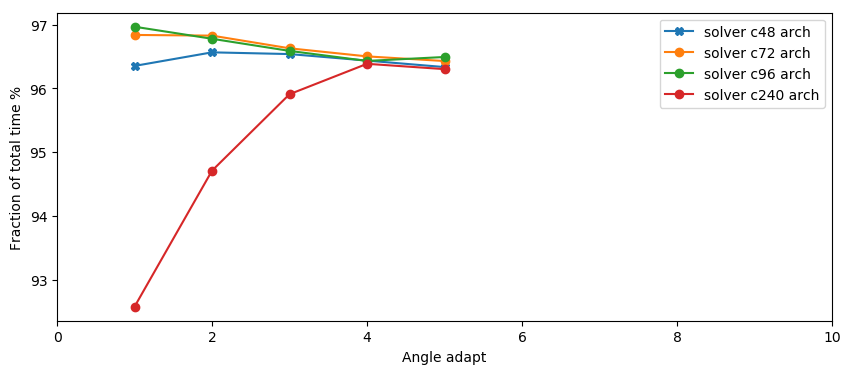

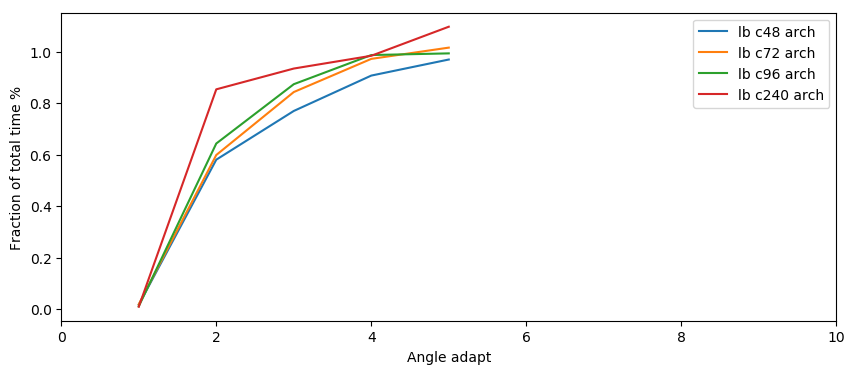

In [8]:
# Get the ratio compared to total time
r_solve_time_c4_arch = solve_time_c4_arch/ wall_time_c4_arch * 100
r_solve_time_c48_arch = solve_time_c48_arch/ wall_time_c48_arch * 100
r_solve_time_c72_arch = solve_time_c72_arch/ wall_time_c72_arch * 100
r_solve_time_c96_arch = solve_time_c96_arch/ wall_time_c96_arch * 100
r_solve_time_c240_arch = solve_time_c240_arch/ wall_time_c240_arch * 100

r_lb_time_c4_arch = lb_time_c4_arch/ wall_time_c4_arch * 100
r_lb_time_c48_arch = lb_time_c48_arch/ wall_time_c48_arch * 100
r_lb_time_c72_arch = lb_time_c72_arch/ wall_time_c72_arch * 100
r_lb_time_c96_arch = lb_time_c96_arch/ wall_time_c96_arch * 100
r_lb_time_c240_arch = lb_time_c240_arch/ wall_time_c240_arch * 100

# Grouping quantities together in lists
wall_time = [wall_time_c48_arch, wall_time_c72_arch, wall_time_c96_arch, wall_time_c240_arch]
wall_time_refined = [wall_time_c48_arch_refined1, wall_time_c72_arch_refined1, wall_time_c240_arch_refined1, wall_time_c480_arch_refined1]
lb_time = [lb_time_c4_arch[:8], lb_time_c48_arch, lb_time_c72_arch, lb_time_c96_arch, lb_time_c240_arch]

# Plot relative solver and load balancer times (relative to the total runtime)
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(range(1, len(r_solve_time_c48_arch)+1), r_solve_time_c48_arch, label='solver c48 arch', marker='X')
ax.plot(range(1, len(r_solve_time_c72_arch)+1), r_solve_time_c72_arch, label='solver c72 arch', marker='o')
ax.plot(range(1, len(r_solve_time_c96_arch)+1), r_solve_time_c96_arch, label='solver c96 arch', marker='o')
ax.plot(range(1, len(r_solve_time_c240_arch)+1), r_solve_time_c240_arch, label='solver c240 arch', marker='o')

ax.legend()                                                                                                            
ax.set(xlabel='Angle adapt', ylabel='Fraction of total time %')                                                                                              
ax.set_xlim(left=0, right=10)                                                                                              
fig.show()

# Plot the load balancing times separately
fig, ax = plt.subplots(figsize=(10, 4))                        
ax.plot(range(1, len(r_lb_time_c48_arch)+1), r_lb_time_c48_arch, label='lb c48 arch')  
ax.plot(range(1, len(r_lb_time_c72_arch)+1), r_lb_time_c72_arch, label='lb c72 arch')                              
ax.plot(range(1, len(r_lb_time_c96_arch)+1), r_lb_time_c96_arch, label='lb c96 arch')                              
ax.plot(range(1, len(r_lb_time_c240_arch)+1), r_lb_time_c240_arch, label='lb c240 arch')                              
                                                                                                                        
ax.legend()                                                                                                            
ax.set(xlabel='Angle adapt', ylabel='Fraction of total time %')                                                                                              
ax.set_xlim(left=0, right=10)                                                                                              
fig.show()


 _In the first figure the green line (core48) represent an example where the halos are considerably smaller in size,
 when compared to the number of elements each partition has. **This is part of a few STRONG scaling runs**_

 Other than that we can see, that we tend to spend a decreasing fraction of our total time load balancing as the
 core count increases. The results displayed here are part of the short STRONG-scaling study.

 You can see below how the CDOFs of each run per core for our adapt steps
 ## 1. CDOF per core vs adapt count for the above times: Provides insight as to why did the 48core case spend more time  in the linear solver from what was expected.
 ## 2. Walltime per core vs adapt count: Helps us to determine why did the 48 core case spend so much time in the solver and if the ratio for CDOF/CPU we have is optimal


In [9]:
####################################### CDOF ###########################################################################

# 1. Plot: Get the CODF per core
# cdof_c4_arch_pc = cdof_c4_arch/4
cdof_c48_arch_pc = cdof_c48_arch/48
cdof_c72_arch_pc = cdof_c72_arch/72
cdof_c96_arch_pc = cdof_c96_arch/96
cdof_c240_arch_pc = cdof_c240_arch/240

# 2. Plot:
# wall_time_105_pc = wall_time_105/4               
wall_time_c4_arch_pc = wall_time_c4_arch/4       
wall_time_c48_arch_pc = wall_time_c48_arch/48    
wall_time_c72_arch_pc = wall_time_c72_arch/72    
wall_time_c96_arch_pc = wall_time_c96_arch/96    
wall_time_c240_arch_pc = wall_time_c240_arch/240 

# Grouping together lists
cdof_pc = [cdof_c48_arch_pc, cdof_c72_arch_pc, cdof_c96_arch_pc, cdof_c240_arch_pc]
# The growth of CDOFs as we adapt, we keep only the first 8 because then the fit does not work as well
cdof = [cdof_c4_arch[:8], cdof_c24_arch, cdof_c72_arch, cdof_c72_arch_refined1]
cdof_refined = [cdof_c48_arch_refined1, cdof_c72_arch_refined1, cdof_c240_arch_refined1]
wall_time_pc = [wall_time_c48_arch_pc, wall_time_c72_arch_pc, wall_time_c96_arch_pc, wall_time_c240_arch_pc]


 ## Dependance of time spent load balancing vs CDOF
 Here we try to establish if there is a pattern between the total CDOF
 and the time spent in the load balancer. The following observations are made:
 - Identical meshes (same element spacing) have identical CDOFs
 - Increasing the core count in the identical meshes, results in less steep slopes
 - Changing the mesh spacing and keeping the core count the same results into parallel slopes
 -

a:  [7.693810141340574e-06, 2.967137007836e-06, 1.6874868328275358e-06, 1.2133638540283323e-06, 9.156765618596402e-07, 4.644410719583476e-07, 1.6087681745766184e-06, 1.1900467330871748e-06, 4.7350494520350087e-07, 2.8128407798471424e-07] 
b:  [-0.2167672855718208, -0.26924997904586423, -0.6564848086756152, -0.4552794996339964, -0.31658089448142235, -0.1019973053033284, -1.1604435316115298, -0.8998493513592019, -0.13956922502643532, -0.04178499815274406] 
e:  [0.9737994780189166, 0.999329966779187, 0.9997728983711556, 0.9997531773899483, 0.9993142622255053, 0.9955277418600887, 0.9996249046121137, 0.9998656354972153, 0.9922856875766173, 0.9861899320834894]


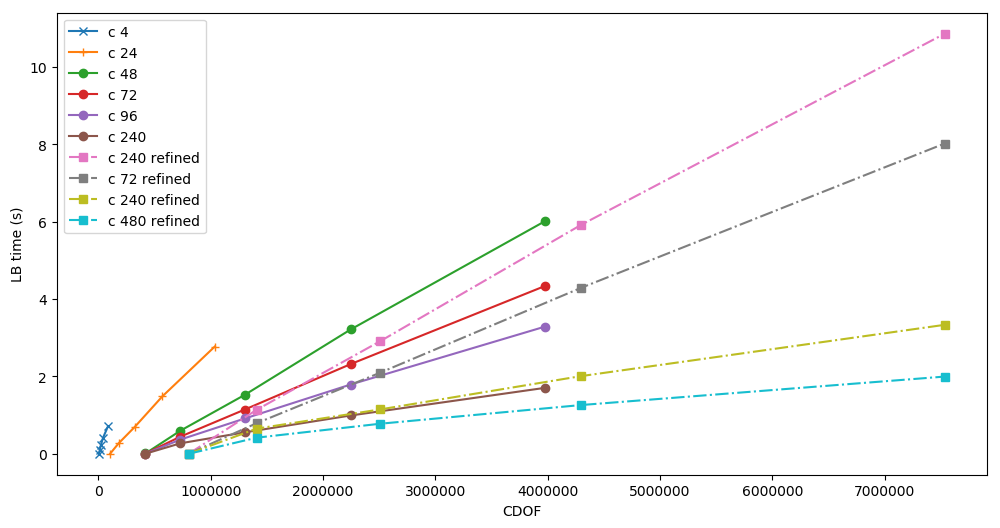

In [10]:
############################## Plot the CDOF vs LB #############################
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(cdof_c4_arch[:5], lb_time_c4_arch[:5], label='c 4', marker='x')
# ----------------------------------------------------------------------------------------------------------------------
ax.plot(cdof_c24_arch, lb_time_c24_arch, label='c 24', marker='+')
# ----------------------------------------------------------------------------------------------------------------------
ax.plot(cdof_c48_arch, lb_time_c48_arch, label='c 48', marker='o')
ax.plot(cdof_c72_arch, lb_time_c72_arch, label='c 72', marker='o')
ax.plot(cdof_c96_arch, lb_time_c96_arch, label='c 96', marker='o')
ax.plot(cdof_c240_arch, lb_time_c240_arch, label='c 240', marker='o')
# ----------------------------------------------------------------------------------------------------------------------
ax.plot(cdof_c48_arch_refined1, lb_time_c48_arch_refined1, label='c 240 refined', linestyle='-.', marker='s')
ax.plot(cdof_c72_arch_refined1, lb_time_c72_arch_refined1, label='c 72 refined',    linestyle='-.', marker='s')
ax.plot(cdof_c240_arch_refined1, lb_time_c240_arch_refined1, label='c 240 refined', linestyle='-.', marker='s')
ax.plot(cdof_c480_arch_refined1, lb_time_c480_arch_refined1, label='c 480 refined', linestyle='-.', marker='s')

###### Do linear fits of the above plots
nfits = 10
slopes, intercepts, err = nfits*[0], nfits*[0], nfits*[0]

i = 0
slopes[i], intercepts[i], err[i], _, _ = linregress(cdof_c4_arch, lb_time_c4_arch)
i += 1
slopes[i], intercepts[i], err[i], _, _ = linregress(cdof_c24_arch, lb_time_c24_arch)
i += 1
slopes[i], intercepts[i], err[i], _, _ = linregress(cdof_c48_arch, lb_time_c48_arch)
i += 1
slopes[i], intercepts[i], err[i], _, _ = linregress(cdof_c72_arch, lb_time_c72_arch)
i += 1
slopes[i], intercepts[i], err[i], _, _ = linregress(cdof_c96_arch, lb_time_c96_arch)
i += 1
slopes[i], intercepts[i], err[i], _, _ = linregress(cdof_c240_arch, lb_time_c240_arch)
i += 1
slopes[i], intercepts[i], err[i], _, _ = linregress(cdof_c48_arch_refined1, lb_time_c48_arch_refined1)
i += 1
slopes[i], intercepts[i], err[i], _, _ = linregress(cdof_c72_arch_refined1, lb_time_c72_arch_refined1)
i += 1
slopes[i], intercepts[i], err[i], _, _ = linregress(cdof_c240_arch_refined1, lb_time_c240_arch_refined1)
i += 1
slopes[i], intercepts[i], err[i], _, _ = linregress(cdof_c480_arch_refined1, lb_time_c480_arch_refined1)
i += 1

ax.legend()
ax.set(xlabel='CDOF', ylabel='LB time (s)')
fig.show()

print('a: ', slopes,'\nb: ', intercepts, '\ne: ', err)


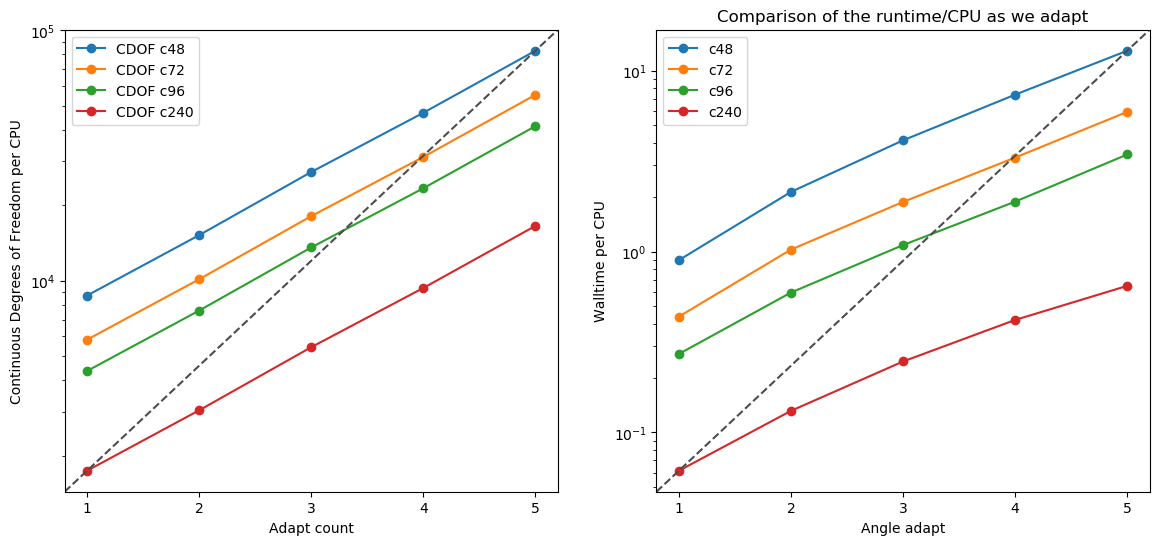

CDOF/Core (48):  [ 8728.08333333 15206.27083333 27157.375      46791.25
 82766.6875    ]
CDOF/Core (72):  [ 5818.72222222 10137.51388889 18104.91666667 31194.16666667
 55177.83333333]
CDOF/Core (240):  [ 1745.61666667  3041.25416667  5431.475       9358.25
 16553.3375    ]


In [11]:
################# CDOF/CPU vs Adapt, WALLTIME/CPU vs ADAPT #####################
x = list(range(1, len(cdof_c48_arch)+1))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

# Plot the increase of the CDOF over adapt
for c, y, w in zip(cores, cdof_pc, wall_time_pc):    
    ax1.plot(x, y, label=f'CDOF c{c}', marker='o')
    ax2.plot(x, w, label=f'c{c}', marker='o')

ax1.plot([0, 1], [0, 1], transform=ax1.transAxes, ls="--", c=".3")
ax1.set_yscale('log')
ax1.set(xlabel='Adapt count', ylabel='Continuous Degrees of Freedom per CPU')
ax1.set_xticks(x)
ax1.legend()

ax2.plot([0, 1], [0, 1], transform=ax2.transAxes, ls="--", c=".3")
ax2.set_yscale('log')
ax2.legend()
ax2.set_title('Comparison of the runtime/CPU as we adapt')
ax2.set(xlabel='Angle adapt', ylabel='Walltime per CPU')
ax2.set_xticks(x)
plt.show()

print('CDOF/Core (48): ', cdof_c48_arch_pc)
print('CDOF/Core (72): ', cdof_c72_arch_pc)
print('CDOF/Core (240): ', cdof_c240_arch_pc)


 # How does the number of CDOF increase rate when we weak scale the mesh?
 If it scales up in a predictable manner, then by running a simple computation (coarse mesh) on a small number of cores,
 we would be able to predict how the CDOFs in a superfine mesh would change.
 Then, knowing that we have good enough strong scaling we would be able to have an ETA for the total runtime

[5.82977502e+03 6.89909358e-01]
[9.99716757e+04 5.84028060e-01]
[4.17943087e+05 5.62718930e-01]
[8.14774820e+05 5.55955262e-01]


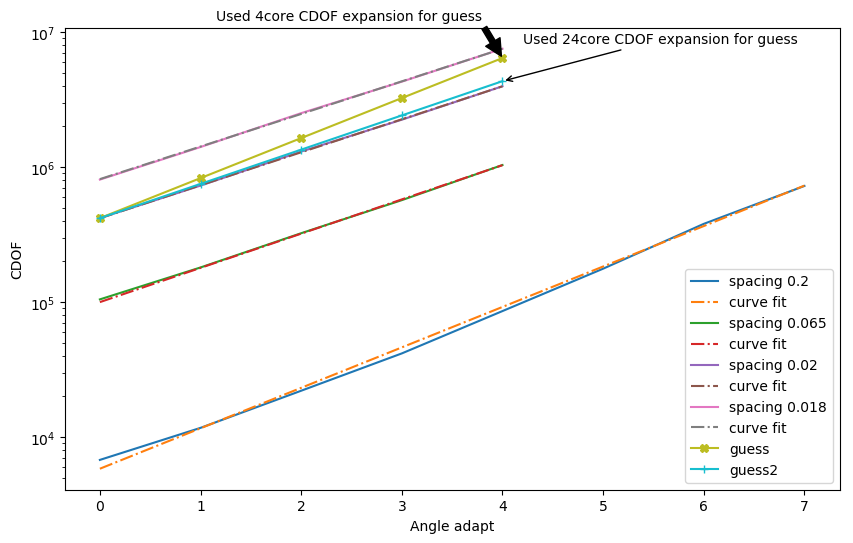

In [12]:
########################### CDOF+ADAPT APPROXIMATION MODEL #################################################
# Mesh spacing 
sp = [0.2, 0.065, 0.02, 0.018]
fig, ax = plt.subplots(figsize=(10,6))


def f(x, a, b):
    return a*np.exp(b*x)

def approx_cdof(x, b, y):
    """
        Performs a semi-log curve fit and extrapolation.
        You provide the x,y CDOF for a coarse mesh and 
        the function will extrapolate assuming semi-log
        scaling of the CDOF regardless of mesh spacing.
        This allows us to approximate the total CDOF of a 
        superfine mesh by running very cheap simulations on
        a coarse mesh. 
    """
    popt, pcov = curve_fit(f, x, y)
    guess = f(x, b, popt[1])
    return guess

# Perform exponential curve fits to the CDOFs vs Adapt
for s, c in zip(sp, cdof):
    x = list(range(len(c)))
    ax.plot(x, c, label=f'spacing {s}')
    
    fit, popt = curve_fit(f, x, c)
    print(fit)
    xx = np.linspace(x[0], x[-1], 100)
    ax.plot(xx, f(xx, fit[0], fit[1]), label=f'curve fit', linestyle='-.') 

# Now let's try approximating the superfine mesh with the coarse mesh
# We use the slope from the curve fit (parameter b) and calculate the y-axis 
# intercept which is the initial CDOF of the new mesh

offset = (cdof_c72_arch[0])
temp = np.array([0, 1, 2, 3, 4])

guess = approx_cdof(temp, offset, cdof_c4_arch[:5])
ax.plot(temp, guess, label='guess', marker='X')
ax.annotate('Used 4core CDOF expansion for guess',
            xy=(temp[-1], guess[-1]), xycoords='data', 
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')

guess2 = approx_cdof(temp, cdof_c240_arch[0], cdof_c24_arch[:5])
ax.plot(temp, guess2, label='guess2', marker='+')
ax.annotate('Used 24core CDOF expansion for guess',
            xy=(temp[-1], guess2[-1]), xycoords='data', 
            xytext=(15, 25), textcoords='offset points',
            arrowprops=dict(arrowstyle="->"),
            horizontalalignment='left', verticalalignment='bottom')

ax.set(xlabel='Angle adapt', ylabel='CDOF')
ax.set_yscale('log')
ax.legend()
fig.show()


 ## Strong scaling results
 Here we show two different strong scaling studies:
 - one with an element spacing of 0.02 which causes performance bottleneck for the 240 core case
 - another one with element spacing of 0.018, which behaves smoothly for 240 cores

[1624.777, 1069.781, 334.75, 223.162]


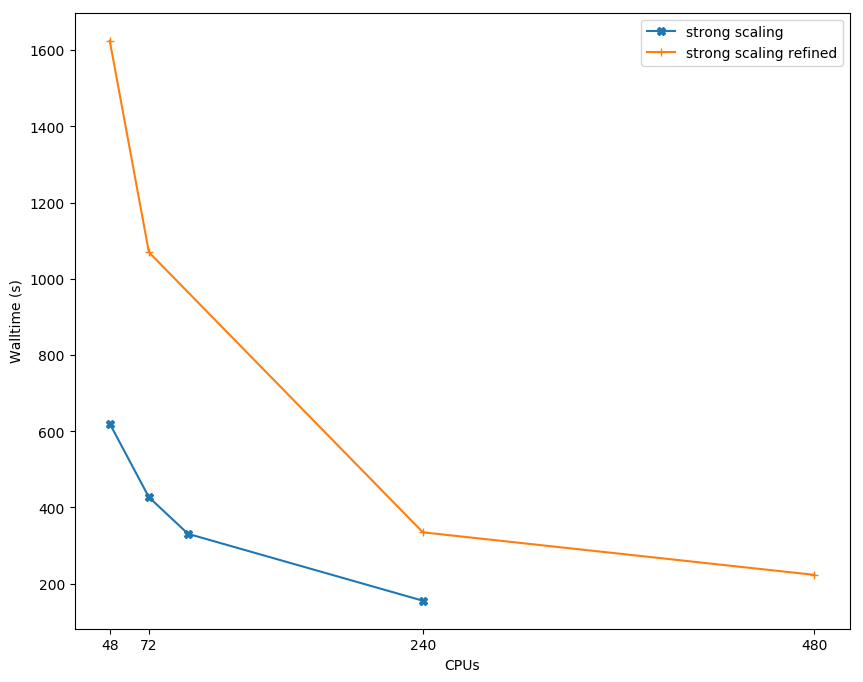

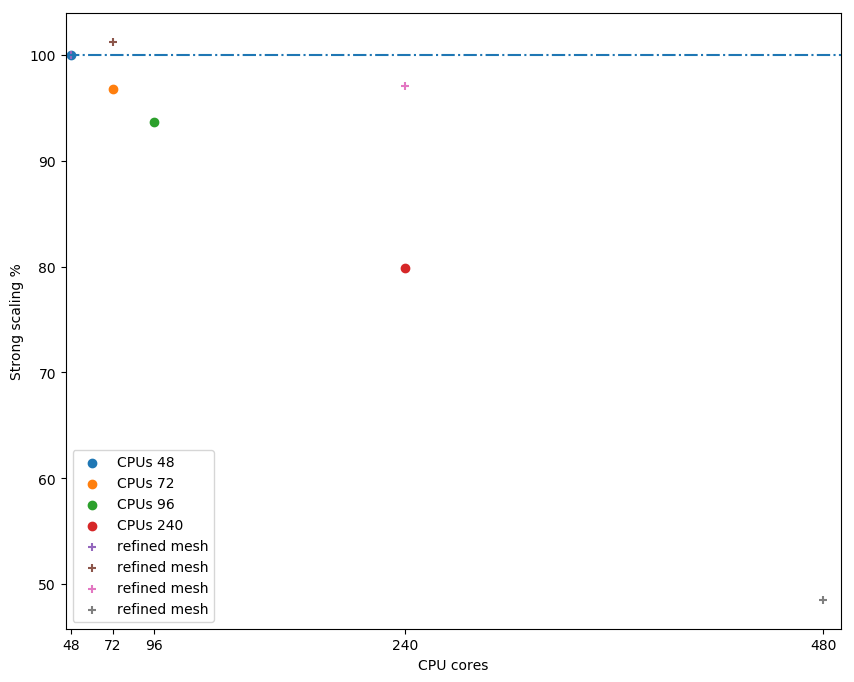

In [13]:
###################################### STRONG SCALING ##################################################################
def strong_scaling(t0, c0, tn, cn):
    """
        Takes the time and number of cores for 2 simulations and returns 
    """
    return t0 / (cn/c0 * tn) * 100

# The finish times of the strong scaling studies
time_sc = [wall_time_c48_arch[-1], wall_time_c72_arch[-1], wall_time_c96_arch[-1], wall_time_c240_arch[-1]]
time_sc2 = [wall_time_refined[0][-1], wall_time_refined[1][-1], wall_time_refined[2][-1], wall_time_refined[3][-1]]

fig, ax1 = plt.subplots(figsize=(10,8))
fig2, ax2 = plt.subplots(figsize=(10,8))

ax1.plot(cores, time_sc, label='strong scaling', marker='X')
ax1.plot([48, 72, 240, 480], time_sc2, label='strong scaling refined', marker='+')
print(time_sc2)
# ax1.plot([1, 0], [0, 1], transform=ax.transAxes, ls="--", c=".3")
ax1.set(xlabel='CPUs', ylabel='Walltime (s)')
# ax1.set_title('Walltime reduction per increase in number of cores')
ax1.set_xticks([48, 72, 240, 480])
ax1.legend()

# Strong scaling performance plot
for c, t in zip(cores, time_sc):
    sc = strong_scaling(time_sc[0], 48, t, c)
    ax2.scatter(c, sc, label=f'CPUs {c}')

# Plotting the refined mesh strong scaling study
ax2.scatter(48, strong_scaling(wall_time_refined[0][-1], 48, wall_time_refined[0][-1], 48), 
            marker='+', label='refined mesh')
ax2.scatter(72, strong_scaling(wall_time_refined[0][-1], 48, wall_time_refined[1][-1], 72), 
            marker='+', label='refined mesh')
ax2.scatter(240, strong_scaling(wall_time_refined[0][-1], 48, wall_time_refined[2][-1], 240), 
            marker='+', label='refined mesh')
ax2.scatter(480, strong_scaling(wall_time_refined[0][-1], 48, wall_time_refined[2][-1], 480), 
            marker='+', label='refined mesh')
ax2.plot([45, 490], [100, 100], linestyle='-.')

ax2.legend()
ax2.set(xlabel='CPU cores', ylabel='Strong scaling %')   
ax2.set_xlim(left=45, right=490) 
ax2.set_xticks([48, 72, 96, 240, 480])
fig.show()
fig2.show()


 - The results from the above figures indicate that the ratio for CDOF per core that we thought was the best preformat
 does not appear to be true. Smaller ratios yield much better solver times per core (CPU96)
 - The CDOFs appear to be increasing at a constant logarithmic rate over the adapts
 TODO: run more tests (different .feml) to determine if that rate is constant over the adapts.

 ## What about the number of iterations the linear solver has to do with the initial CDOFs and also the increasing adaptive refinement
 - This is a function of the original mesh's CDOF.
 - If th number of iterations for the solver in an adapt step increase a lot, oposing the previous trends, then that is a
 good indicator that the mesh used for the simulation is not fine enough for the given decomposition and hence the asynchronous
 part of the solver is trying to cope with the many comms that have to be performed.


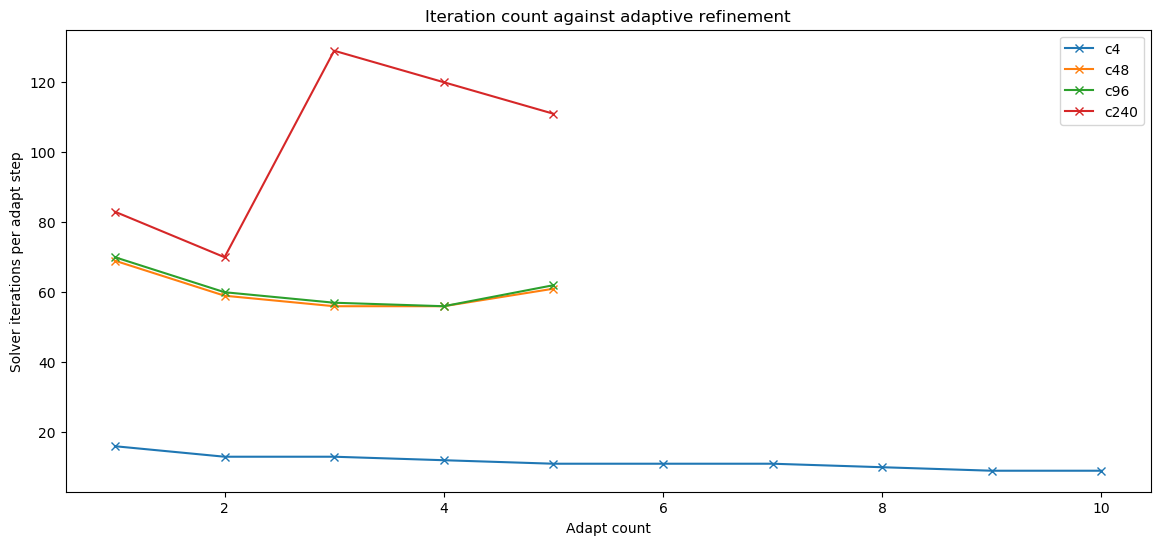

In [14]:
######################### SOLVER ITERATIONS AND CDOFS (UNIMPORTANT) #####################################
os.chdir('/home/gn/Code/Archer/tests/core4')
iter_c4_arch = stat('rad_radiant_lb_hwn_asymmetrical_brunner_lattice.Neutron.iteration.stat')['Iteration_Count']['Value']

# Load the 48 core data
os.chdir('../core48')
iter_c48_arch = stat('rad_radiant_lb_hwn_asymmetrical_brunner_lattice.Neutron.iteration.stat')['Iteration_Count']['Value']

# Load the 96 core data
os.chdir('../core96')
iter_c96_arch = stat('rad_radiant_lb_hwn_asymmetrical_brunner_lattice.Neutron.iteration.stat')['Iteration_Count']['Value']

# Load the 240 core data
os.chdir('../core240')
iter_c240_arch = stat('rad_radiant_lb_hwn_asymmetrical_brunner_lattice.Neutron.iteration.stat')['Iteration_Count']['Value']

# Pack them up in one list
iter_arch = [iter_c4_arch, iter_c48_arch, iter_c96_arch, iter_c240_arch]

fig, ax1 = plt.subplots(figsize=(14,6))
ax1.plot(range(1, len(wall_time_c4_arch)+1), iter_c4_arch, label='c4', marker='x')
ax1.plot(range(1, len(wall_time_c48_arch)+1), iter_c48_arch, label='c48', marker='x')
ax1.plot(range(1, len(wall_time_c96_arch)+1), iter_c96_arch, label='c96', marker='x')
ax1.plot(range(1, len(wall_time_c240_arch)+1), iter_c240_arch, label='c240', marker='x')

ax1.set_title('Iteration count against adaptive refinement')
ax1.set(xlabel='Adapt count', ylabel='Solver iterations per adapt step')
ax1.legend()
fig.show()


 ## How does the solver (iterations) depend on the imbalance it is working with
 Is there any kind of correlation between these two?
 The number of iterations depend on the mesh, hence if we are repartitioning the mesh this ultimately will affect
 the number of iterations the next linear solve will do.
 - Do we observe different number of solver iterations if we change the imbalance tolerance?
 - Is there any dependence on the number of processors that we use and the number of iterations?

[]

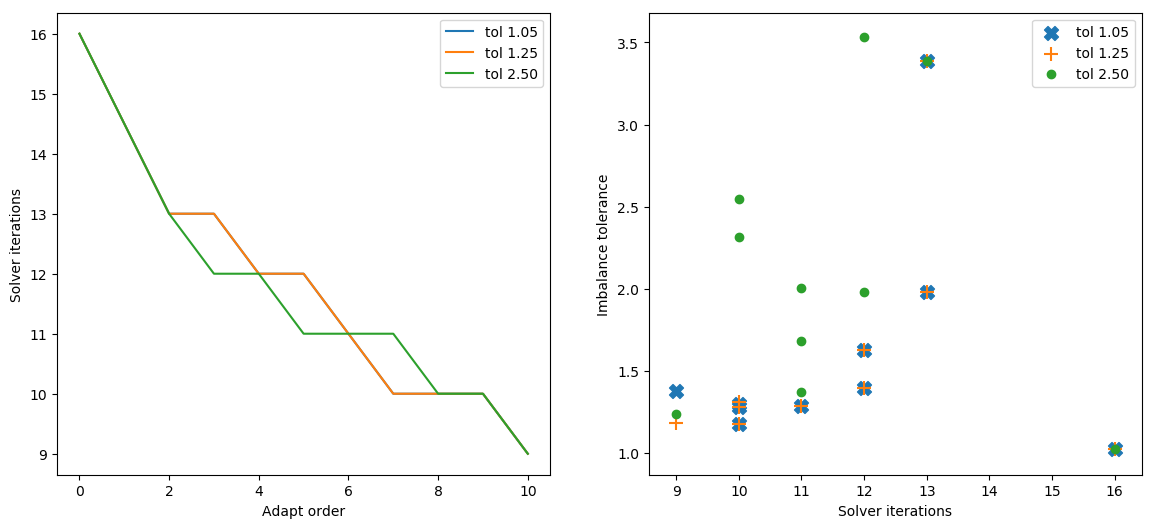

In [15]:
########################### SOLVER ITERATIONS VS TOLERANCE (UNIMPORTANT) ###############################################
os.chdir('/home/gn/Code/ssh/sdargav/tolerance_study')
# Loading the linear solver iterations per adapt for multiple imbalance tolerances
iter_105 = stat('rad_radiant_tol1.05.Neutron.iteration.stat')['Iteration_Count']['Value']
iter_125 = stat('rad_radiant_tol1.25.Neutron.iteration.stat')['Iteration_Count']['Value']
iter_250 = stat('rad_radiant_tol2.50.Neutron.iteration.stat')['Iteration_Count']['Value']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.plot(angle_adapt, iter_105, label='tol 1.05')
ax1.plot(angle_adapt, iter_125, label='tol 1.25')
ax1.plot(angle_adapt, iter_250, label='tol 2.50')

ax2.scatter(iter_105, imb_105, label='tol 1.05', marker='X', s=100)
ax2.scatter(iter_125, imb_125, label='tol 1.25', marker='+', s=100)
ax2.scatter(iter_250, imb_250, label='tol 2.50')

ax1.set(xlabel='Adapt order', ylabel='Solver iterations')
ax1.legend()
ax2.set(ylabel='Imbalance tolerance', xlabel='Solver iterations')
ax2.legend()
plt.plot()


 ## How is the solver's performance affected by the ratio of halos/nodes owned
 - Even though the average <owned node/halo> ratio increases with adapts,
 - Partitions are created where the ratio between owned nodes and halos gets consistently worse. This of course occurs
  in mesh regions where there is heavy scattering od advection/diffusion, e.g. near a neuron source.

 As the ratio of nodes owned over halo tends towards 0, we get a significantly worse parallel
 performance due to the solver having to do more comms rather than more work.


Min owned nodes c72:  [1412.  598.  360.  273.  225.] 
Halos:  [136. 103.  83.  64.  62.] 
Min owned nodes c240:  [423. 184. 102.  80.  64.] 
Halos:  [91. 55. 39. 39. 35.]


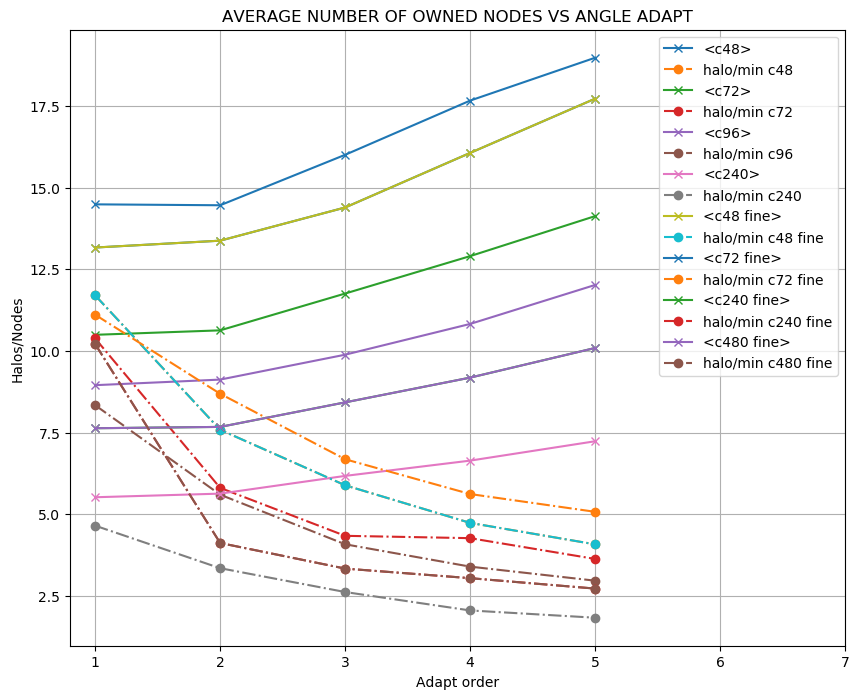

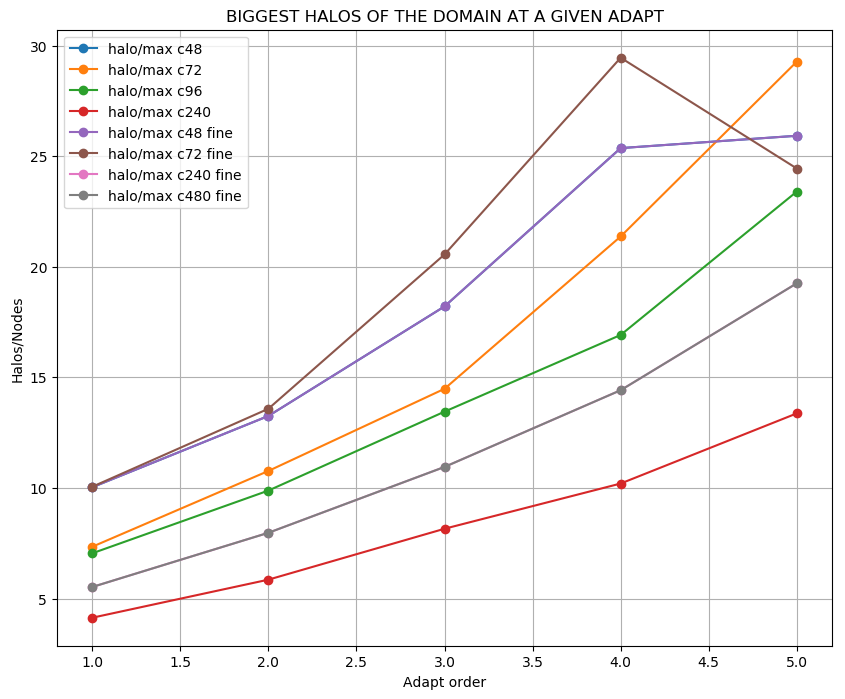

In [16]:
####################################### NODES OWNED/ HALOS #############################################################
def av_min_max_halos(prefix, cores, max_adapt_step):
    """
    I could do a better job algorithmically but this is fine for now.
    Returns the average number of nodes owned, halo 1s, 
    the minimum number of nodes owned at every adapt step, with its halo size,
    the max number of halo nodes at every adapt step, with its nodes owned size.
    It also returns the original node and halo 2d arrays
    """
    nodes = np.ndarray(shape=(cores, max_adapt_step))
    halos = np.ndarray(shape=(cores, max_adapt_step))

    # Run through all the partitions and get the number of nodes owned and the number of nodes in the halo 1
    for i in range(cores):
        nodes[i], halos[i] = np.loadtxt(f'{prefix}.log_{i}', usecols=(1, 3), unpack=True)
        
    av_nodes = np.mean(nodes, axis=0)
    av_halos = np.mean(halos, axis=0)
    
    min_nodes = np.min(nodes, axis=0)
    # Get the index whe the min nodes occurred
    min_halos = halos[np.argmin(nodes, axis=0), [i for i in range(max_adapt_step)]]
    
    max_halos = np.max(halos, axis=0)
    max_nodes = nodes[np.argmax(halos, axis=0), [i for i in range(max_adapt_step)]]
    
    average = [av_nodes, av_halos]
    min_data = [min_nodes, min_halos]
    max_data = [max_nodes, max_halos]
    
    return average, min_data, max_data, nodes, halos

    
os.chdir('/home/gn/Code/Archer/tests/core48')
av48, min48, max48, nodes48, h48 = av_min_max_halos('rad_radiant_noio', 48, 5)
av48_refined1, min48_refined1, max48_refined1, nodes48_refined1, h48_refined1 = av_min_max_halos('rad_radiant_noio', 48, 5)

os.chdir('../core72')
av72, min72, max72, nodes72, h72 = av_min_max_halos('rad_radiant_noio', 72, 5)
av72_refined1, min72_refined1, max72_refined1, nodes72_refined1, h72_refined1 = av_min_max_halos('rad_radiant_noio_refined1', 72, 5)

os.chdir('../core96')
av96, min96, max96, nodes96, h96 = av_min_max_halos('rad_radiant_noio', 96, 5)

os.chdir('../core240')
av240, min240, max240, nodes240, h240 = av_min_max_halos('rad_radiant_noio', 240, 5)
av240_refined1, min240_refined1, max240_refined1, nodes240_refined1, h240_refined1 = av_min_max_halos('rad_radiant_noio_refined1', 240, 5)

os.chdir('../core480')
av480_refined1, min480_refined1, max480_refined1, nodes480_refined1, h480_refined1 = av_min_max_halos('rad_radiant_noio_refined1', 480, 5)

# Define dictionaries with the data for 
# HALOS/AV NODES, HALOS/MIN NODES, HALOS/MAX NODES
av_node_halo_r = {  'c48'       :av48[0]/av48[1],
                    'c72'       :av72[0]/av72[1],
                    'c96'       :av96[0]/av96[1],
                    'c240'      :av240[0]/av240[1],
                    'c48 fine'  :av48_refined1[0]/av48_refined1[1],
                    'c72 fine'  :av72_refined1[0]/av72_refined1[1],
                    'c240 fine' :av240_refined1[0]/av240_refined1[1],
                    'c480 fine' :av240_refined1[0]/av240_refined1[1]}


min_node_halo_r = { 'c48'       :min48[0]/min48[1],
                    'c72'       :min72[0]/min72[1],
                    'c96'       :min96[0]/min96[1],
                    'c240'      :min240[0]/min240[1],
                    'c48 fine'  :min48_refined1[0]/min48_refined1[1],
                    'c72 fine'  :min72_refined1[0]/min72_refined1[1],
                    'c240 fine' :min240_refined1[0]/min240_refined1[1],
                    'c480 fine' :min240_refined1[0]/min240_refined1[1]}

max_node_halo_r = { 'c48'       :max48[0]/max48[1],
                    'c72'       :max72[0]/max72[1],
                    'c96'       :max96[0]/max96[1],
                    'c240'      :max240[0]/max240[1],
                    'c48 fine'  :max48_refined1[0]/max48_refined1[1],
                    'c72 fine'  :max72_refined1[0]/max72_refined1[1],
                    'c240 fine' :max240_refined1[0]/max240_refined1[1],
                    'c480 fine' :max240_refined1[0]/max240_refined1[1]}

fix, ax1 = plt.subplots(figsize=(10, 8))
fig3, ax3 = plt.subplots(figsize=(10, 8))
# Plot the average number of owned nodes/halo1 nodes
# Partitions with small nodes/halos ratio have a comparable number of nodes and halo nodes
# as a result this nodes spending most of their time doing comms rather than solving
for k1, av, in av_node_halo_r.items():
    ax1.plot(range(1, 6), av, marker='x', label=f'<{k1}>')
    ax1.plot(range(1, 6), min_node_halo_r[k1], marker='o', linestyle='-.', label=f'halo/min {k1}')
    ax3.plot(range(1, 6), max_node_halo_r[k1], marker='o', label=f'halo/max {k1}')

ax1.legend()
ax1.grid(True)
ax1.set_xlim(right=7)
ax1.set_title('AVERAGE NUMBER OF OWNED NODES VS ANGLE ADAPT')
ax1.set(xlabel='Adapt order', ylabel='Halos/Nodes')

ax3.legend()
ax3.grid(True)
ax3.set(xlabel='Adapt order', ylabel='Halos/Nodes') 
ax3.set_title('BIGGEST HALOS OF THE DOMAIN AT A GIVEN ADAPT')
fix.show()
fig3.show()
print('Min owned nodes c72: ', min72[0], '\nHalos: ', min72[1], '\nMin owned nodes c240: ', min240[0], '\nHalos: ', min240[1])


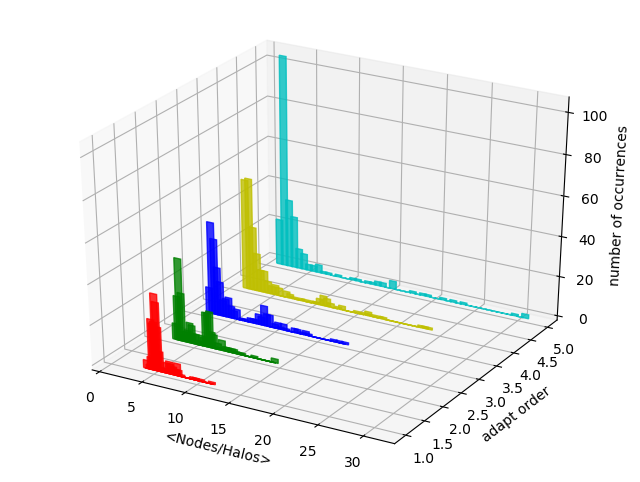

In [17]:
######################## NODES/HALOS HISTOGRAMS VS ADAPTS 3D HIST

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
nbins = 50
for c, z, col in zip(['r', 'g', 'b', 'y', 'c'], [1, 2, 3, 4, 5], range(len(nodes240[0]))):

    nodes = [row[col] for row in nodes240]
    halos = [row[col] for row in h240]
    ys = np.divide(nodes, halos)

    hist, bins = np.histogram(ys, bins=nbins)
    xs = (bins[:-1] + bins[1:])/2

    ax.bar(xs, hist, zs=z, zdir='y', color=c, ec=c, alpha=0.8)

ax.set_xlabel('<Nodes/Halos>')
ax.set_ylabel('adapt order')
ax.set_zlabel('number of occurrences')

plt.show()


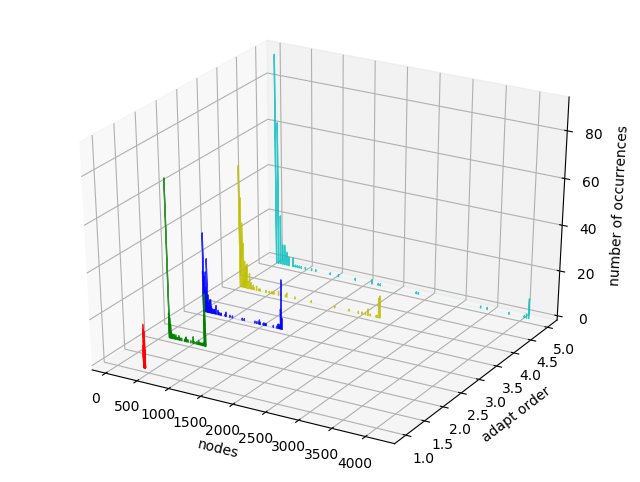

In [18]:
########################### DISTRIBUTION OF NUMBER OF NODES IN PARTITIONS
#%matplotlib qt
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
nbins = 120
for c, z, col in zip(['r', 'g', 'b', 'y', 'c'], [1, 2, 3, 4, 5], range(len(nodes240[0]))):

    nodes = [row[col] for row in nodes240]

    hist, bins = np.histogram(nodes, bins=nbins)
    xs = (bins[:-1] + bins[1:])/2

    ax.bar(xs, hist, zs=z, zdir='y', color=c, ec=c, alpha=0.8)

ax.set_xlabel('nodes')
ax.set_ylabel('adapt order')
ax.set_zlabel('number of occurrences')

plt.show()


